In [55]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions

In [19]:
X , Y = load_iris(return_X_y=True)

In [25]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4'])

In [29]:
df['target'] = Y

In [31]:
df

,col1,col2,col3,col4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
# Step 1: Calculating weights for each row
df['weights'] = 1/df.shape[0]

In [35]:
df

,col1,col2,col3,col4,target,weights
0,5.1,3.5,1.4,0.2,0,0.006667
1,4.9,3.0,1.4,0.2,0,0.006667
2,4.7,3.2,1.3,0.2,0,0.006667
3,4.6,3.1,1.5,0.2,0,0.006667
4,5.0,3.6,1.4,0.2,0,0.006667
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.006667
146,6.3,2.5,5.0,1.9,2,0.006667
147,6.5,3.0,5.2,2.0,2,0.006667
148,6.2,3.4,5.4,2.3,2,0.006667


In [37]:
df['weights'].sum()

1.0000000000000002

In [75]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4:5].values

In [77]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [79]:
# Step 2: Apply decision Stump
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]')]

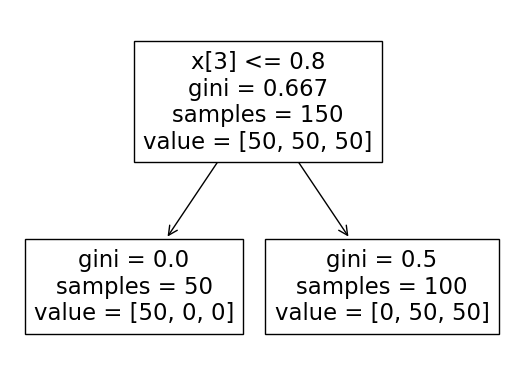

In [81]:
plot_tree(dt1)

In [89]:
# Step 3: Calculate predictions
df['y_pred'] = dt1.predict(X)

In [95]:
df.sample(5)

,col1,col2,col3,col4,target,weights,y_pred
69,5.6,2.5,3.9,1.1,1,0.006667,1
129,7.2,3.0,5.8,1.6,2,0.006667,1
49,5.0,3.3,1.4,0.2,0,0.006667,0
110,6.5,3.2,5.1,2.0,2,0.006667,1
25,5.0,3.0,1.6,0.2,0,0.006667,0


In [120]:
error = 0
for index,row in df.iterrows():
    if row['target'] != row['y_pred']:
        error = error + row['weights']

In [125]:
# Step 4: Calculate alpha 
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/(error+0.0000001))

In [127]:
alpha1 = calculate_model_weight(error)
alpha1

0.3465734402799959

In [133]:
def update_row_weight(row, alpha1 = alpha1):
    if row['target'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha1)
    else:
        return row['weights'] * np.exp(alpha1)

In [135]:
df['updated_weights'] = df.apply(update_row_weight, axis=1)

In [139]:
df['updated_weights'].sum()

0.942809041582074

In [141]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [145]:
df['normalized_weights'].sum()

1.0

In [147]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [149]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [151]:
df

,col1,col2,col3,col4,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,5.1,3.5,1.4,0.2,0,0.006667,0,0.004714,0.005,0.005,0.000
1,4.9,3.0,1.4,0.2,0,0.006667,0,0.004714,0.005,0.010,0.005
2,4.7,3.2,1.3,0.2,0,0.006667,0,0.004714,0.005,0.015,0.010
3,4.6,3.1,1.5,0.2,0,0.006667,0,0.004714,0.005,0.020,0.015
4,5.0,3.6,1.4,0.2,0,0.006667,0,0.004714,0.005,0.025,0.020
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.006667,1,0.009428,0.010,0.960,0.950
146,6.3,2.5,5.0,1.9,2,0.006667,1,0.009428,0.010,0.970,0.960
147,6.5,3.0,5.2,2.0,2,0.006667,1,0.009428,0.010,0.980,0.970
148,6.2,3.4,5.4,2.3,2,0.006667,1,0.009428,0.010,0.990,0.980


In [153]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [155]:
index_values = create_new_dataset(df)

In [157]:
index_values

[68,
 103,
 106,
 137,
 56,
 119,
 76,
 9,
 130,
 105,
 31,
 68,
 74,
 94,
 103,
 145,
 39,
 42,
 121,
 137,
 60,
 134,
 45,
 77,
 135,
 105,
 9,
 100,
 133,
 72,
 148,
 138,
 131,
 82,
 69,
 86,
 73,
 110,
 113,
 118,
 12,
 109,
 103,
 146,
 103,
 107,
 142,
 101,
 128,
 102,
 37,
 144,
 128,
 49,
 131,
 31,
 129,
 58,
 5,
 4,
 127,
 81,
 97,
 123,
 90,
 59,
 13,
 127,
 87,
 101,
 130,
 135,
 123,
 135,
 148,
 15,
 42,
 12,
 145,
 124,
 114,
 127,
 22,
 51,
 8,
 121,
 118,
 42,
 109,
 74,
 100,
 69,
 122,
 135,
 74,
 81,
 34,
 124,
 139,
 145,
 13,
 142,
 102,
 55,
 143,
 137,
 108,
 46,
 120,
 44,
 132,
 134,
 118,
 39,
 12,
 8,
 75,
 82,
 109,
 81,
 131,
 13,
 127,
 72,
 139,
 127,
 94,
 147,
 104,
 89,
 129,
 2,
 141,
 2,
 79,
 21,
 148,
 120,
 43,
 145,
 114,
 110,
 122,
 93,
 122,
 140,
 125,
 65,
 132,
 131]

In [173]:
second_df = df.iloc[index_values, [0,1,2,3,4,5]]

In [175]:
second_df

,col1,col2,col3,col4,target,weights
68,6.2,2.2,4.5,1.5,1,0.006667
103,6.3,2.9,5.6,1.8,2,0.006667
106,4.9,2.5,4.5,1.7,2,0.006667
137,6.4,3.1,5.5,1.8,2,0.006667
56,6.3,3.3,4.7,1.6,1,0.006667
...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,0.006667
125,7.2,3.2,6.0,1.8,2,0.006667
65,6.7,3.1,4.4,1.4,1,0.006667
132,6.4,2.8,5.6,2.2,2,0.006667


In [177]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [179]:
X = second_df.iloc[:,0:4].values
Y = second_df.iloc[:,-2].values

In [181]:
dt2.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[2] <= 4.75\ngini = 0.585\nsamples = 150\nvalue = [31, 34, 85]'),
 Text(0.25, 0.25, 'gini = 0.516\nsamples = 62\nvalue = [31, 30, 1]'),
 Text(0.75, 0.25, 'gini = 0.087\nsamples = 88\nvalue = [0, 4, 84]')]

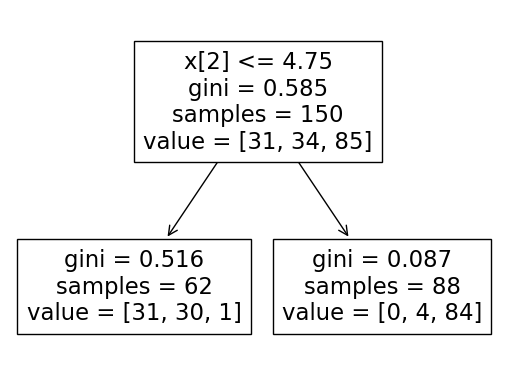

In [183]:
plot_tree(dt2)

In [185]:
second_df['y_pred'] = dt2.predict(X)

In [187]:
second_df

,col1,col2,col3,col4,target,weights,y_pred
68,6.2,2.2,4.5,1.5,1,0.006667,0
103,6.3,2.9,5.6,1.8,2,0.006667,2
106,4.9,2.5,4.5,1.7,2,0.006667,0
137,6.4,3.1,5.5,1.8,2,0.006667,2
56,6.3,3.3,4.7,1.6,1,0.006667,0
...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,0.006667,2
125,7.2,3.2,6.0,1.8,2,0.006667,2
65,6.7,3.1,4.4,1.4,1,0.006667,0
132,6.4,2.8,5.6,2.2,2,0.006667,2


In [189]:
error = 0
for index,row in df.iterrows():
    if row['target'] != row['y_pred']:
        error = error + row['weights']

In [191]:
alpha2 = calculate_model_weight(error)

In [193]:
alpha2

0.3465734402799959

In [201]:
def update_row_weight(row, alpha=alpha2):
    if row['target'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [203]:
second_df['updated_weights'] = second_df.apply(update_row_weight, axis=1)

In [205]:
second_df

,col1,col2,col3,col4,target,weights,y_pred,updated_weights
68,6.2,2.2,4.5,1.5,1,0.006667,0,0.009428
103,6.3,2.9,5.6,1.8,2,0.006667,2,0.004714
106,4.9,2.5,4.5,1.7,2,0.006667,0,0.009428
137,6.4,3.1,5.5,1.8,2,0.006667,2,0.004714
56,6.3,3.3,4.7,1.6,1,0.006667,0,0.009428
...,...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,0.006667,2,0.004714
125,7.2,3.2,6.0,1.8,2,0.006667,2,0.004714
65,6.7,3.1,4.4,1.4,1,0.006667,0,0.009428
132,6.4,2.8,5.6,2.2,2,0.006667,2,0.004714


In [207]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [209]:
second_df

,col1,col2,col3,col4,target,weights,y_pred,updated_weights,normalized_weights
68,6.2,2.2,4.5,1.5,1,0.006667,0,0.009428,0.010811
103,6.3,2.9,5.6,1.8,2,0.006667,2,0.004714,0.005405
106,4.9,2.5,4.5,1.7,2,0.006667,0,0.009428,0.010811
137,6.4,3.1,5.5,1.8,2,0.006667,2,0.004714,0.005405
56,6.3,3.3,4.7,1.6,1,0.006667,0,0.009428,0.010811
...,...,...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,0.006667,2,0.004714,0.005405
125,7.2,3.2,6.0,1.8,2,0.006667,2,0.004714,0.005405
65,6.7,3.1,4.4,1.4,1,0.006667,0,0.009428,0.010811
132,6.4,2.8,5.6,2.2,2,0.006667,2,0.004714,0.005405


In [211]:
second_df['normalized_weights'].sum()

0.9999999999999998

In [213]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [215]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [217]:
second_df

,col1,col2,col3,col4,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
68,6.2,2.2,4.5,1.5,1,0.006667,0,0.009428,0.010811,0.010811,0.000000
103,6.3,2.9,5.6,1.8,2,0.006667,2,0.004714,0.005405,0.016216,0.010811
106,4.9,2.5,4.5,1.7,2,0.006667,0,0.009428,0.010811,0.027027,0.016216
137,6.4,3.1,5.5,1.8,2,0.006667,2,0.004714,0.005405,0.032432,0.027027
56,6.3,3.3,4.7,1.6,1,0.006667,0,0.009428,0.010811,0.043243,0.032432
...,...,...,...,...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,0.006667,2,0.004714,0.005405,0.972973,0.967568
125,7.2,3.2,6.0,1.8,2,0.006667,2,0.004714,0.005405,0.978378,0.972973
65,6.7,3.1,4.4,1.4,1,0.006667,0,0.009428,0.010811,0.989189,0.978378
132,6.4,2.8,5.6,2.2,2,0.006667,2,0.004714,0.005405,0.994595,0.989189


In [219]:
index_values = create_new_dataset(second_df)

In [221]:
third_df = second_df.iloc[index_values, [0,1,2,3,4,5]]

In [223]:
third_df

,col1,col2,col3,col4,target,weights
101,5.8,2.7,5.1,1.9,2,0.006667
140,6.7,3.1,5.6,2.4,2,0.006667
148,6.2,3.4,5.4,2.3,2,0.006667
140,6.7,3.1,5.6,2.4,2,0.006667
2,4.7,3.2,1.3,0.2,0,0.006667
...,...,...,...,...,...,...
55,5.7,2.8,4.5,1.3,1,0.006667
129,7.2,3.0,5.8,1.6,2,0.006667
148,6.2,3.4,5.4,2.3,2,0.006667
74,6.4,2.9,4.3,1.3,1,0.006667


In [233]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:4].values
Y = second_df.iloc[:,4].values

In [235]:
dt3.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

In [237]:
third_df['y_pred'] = dt3.predict(X)

In [239]:
third_df

,col1,col2,col3,col4,target,weights,y_pred
101,5.8,2.7,5.1,1.9,2,0.006667,0
140,6.7,3.1,5.6,2.4,2,0.006667,2
148,6.2,3.4,5.4,2.3,2,0.006667,0
140,6.7,3.1,5.6,2.4,2,0.006667,2
2,4.7,3.2,1.3,0.2,0,0.006667,0
...,...,...,...,...,...,...,...
55,5.7,2.8,4.5,1.3,1,0.006667,2
129,7.2,3.0,5.8,1.6,2,0.006667,2
148,6.2,3.4,5.4,2.3,2,0.006667,0
74,6.4,2.9,4.3,1.3,1,0.006667,2


In [241]:
error = 0
for index,row in df.iterrows():
    if row['target'] != row['y_pred']:
        error = error + row['weights']

In [243]:
alpha3 = calculate_model_weight(error)
alpha3

0.3465734402799959

In [245]:
print(alpha1, alpha2, alpha3)

0.3465734402799959 0.3465734402799959 0.3465734402799959


In [261]:
# Predictions
query = np.array([5.7,2.8,4.5,1.3]).reshape(1,4)
dt1.predict(query)

array([1])

In [263]:
dt2.predict(query)

array([0])

In [265]:
dt3.predict(query)

array([0])

In [269]:
alpha1*1 + alpha2*(0) + alpha3*(0)

0.3465734402799959

In [273]:
np.sign(0.34)

1.0

## Although the implemenetation is for binary classificatin, we are using the dataset which has multiclass classification nature